In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:
data=pd.read_csv(r"C:\Machine_Learning\Deep Learning\SpoityRecommendation\dataset.csv")
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [121]:
data=data.drop("Unnamed: 0",axis=1)
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [124]:
data.to_csv("Spotify.csv",index=False)

In [122]:
def assign_mood(row):
    if row['valence'] > 0.6 and row['energy'] > 0.6:
        return 'Happy'
    elif row['valence'] < 0.4 and row['energy'] < 0.4:
        return 'Sad'
    elif row['acousticness'] > 0.7 and row['energy'] < 0.5:
        return 'Calm'
    elif row['danceability'] > 0.7 and row['energy'] > 0.7:
        return 'Energetic'
    else:
        return 'Chill'

data['mood'] = data.apply(assign_mood, axis=1)
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,mood
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Chill
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Sad
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Sad
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Sad
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Sad
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Sad
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Calm
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Chill


In [123]:
data=data.drop([
    'track_id',       # Just ID
    'album_name',     # Not useful
    'explicit',       # Not related to audio mood/genre/popularity
    'duration_ms',    # Weak correlation; optional
    'key',            # Musical key; optional, complex
    'mode',           # Major/minor mode; noisy
    'time_signature',
    'track_genre',
    # 'artists',
    # 'track_name'# Rarely useful in practice
],axis=1)
data


,artists,track_name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mood
0,Gen Hoshino,Comedy,73,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,Chill
1,Ben Woodward,Ghost - Acoustic,55,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,Sad
2,Ingrid Michaelson;ZAYN,To Begin Again,57,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,Sad
3,Kina Grannis,Can't Help Falling In Love,71,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,Sad
4,Chord Overstreet,Hold On,82,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,Chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,Sleep My Little Boy,21,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,Sad
113996,Rainy Lullaby,Water Into Light,22,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,Sad
113997,Cesária Evora,Miss Perfumado,22,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,Calm
113998,Michael W. Smith,Friends,41,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,Chill


In [73]:
data.isnull().sum()

popularity          0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
mood                0
dtype: int64

In [74]:
data.dtypes

popularity            int64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
mood                 object
dtype: object

In [75]:
data=data.dropna()
data

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mood
0,73,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,Chill
1,55,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,Sad
2,57,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,Sad
3,71,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,Sad
4,82,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,Chill
...,...,...,...,...,...,...,...,...,...,...,...
113995,21,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,Sad
113996,22,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,Sad
113997,22,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,Calm
113998,41,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,Chill


In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["mood"]=le.fit_transform(data["mood"])
data["mood"].unique()

array([1, 4, 0, 2, 3])

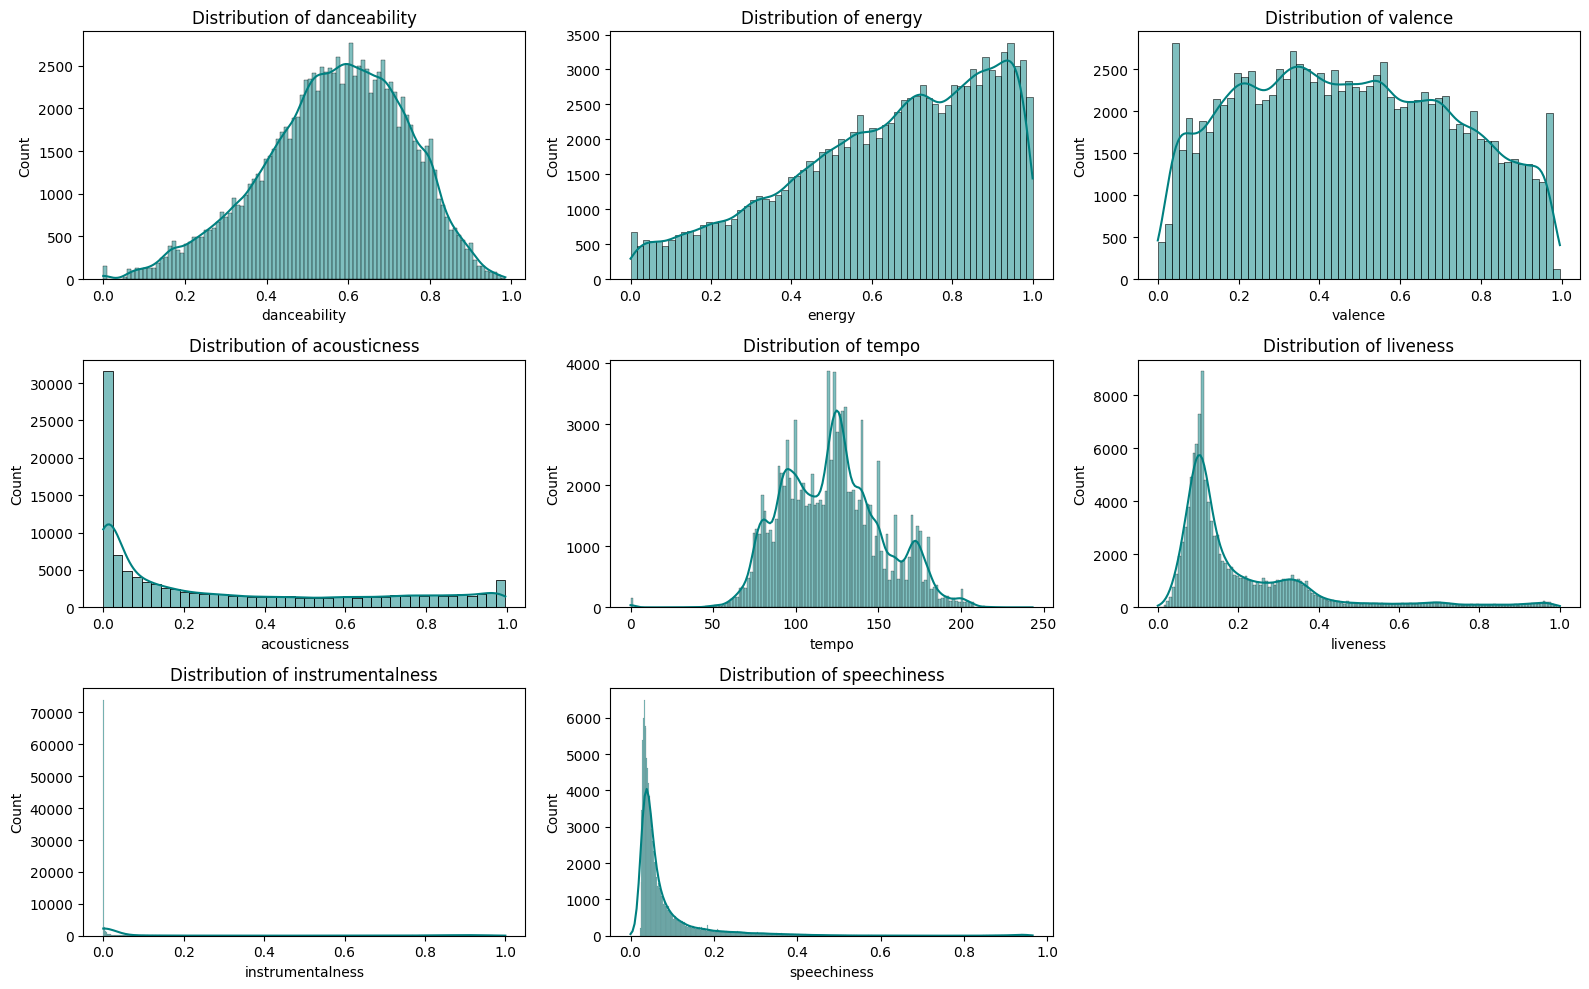

In [82]:
audio_features = [
    'danceability', 'energy', 'valence', 'acousticness',
    'tempo', 'liveness', 'instrumentalness', 'speechiness'
]

plt.figure(figsize=(16, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, color='teal')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


<Axes: >

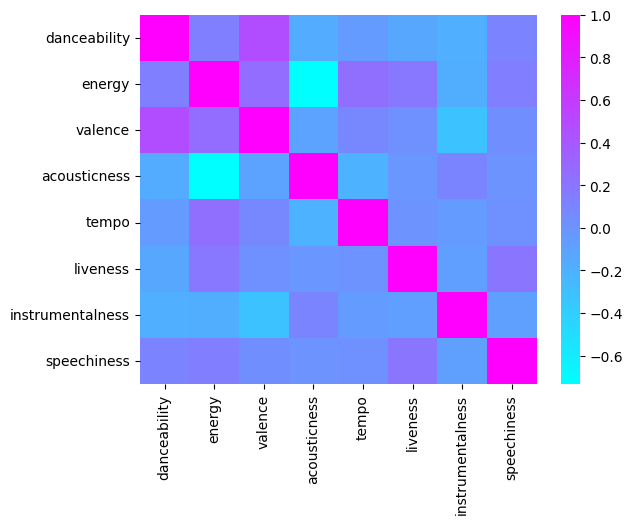

In [83]:
corr = data[audio_features].corr()
sns.heatmap(corr,cmap="cool")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23660\1335248873.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mood', data=data, palette='Set2')


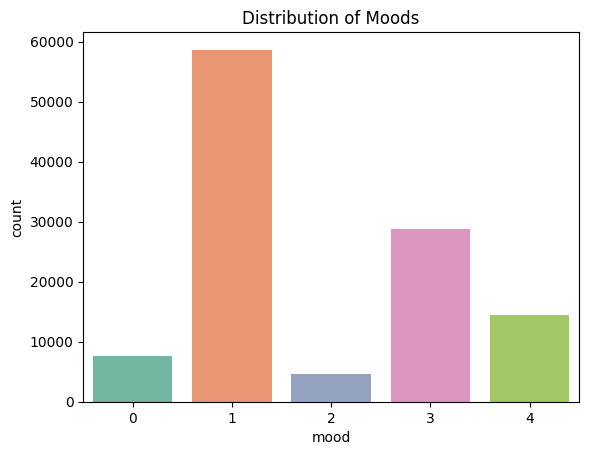

In [84]:
sns.countplot(x='mood', data=data, palette='Set2')
plt.title('Distribution of Moods')
plt.show()


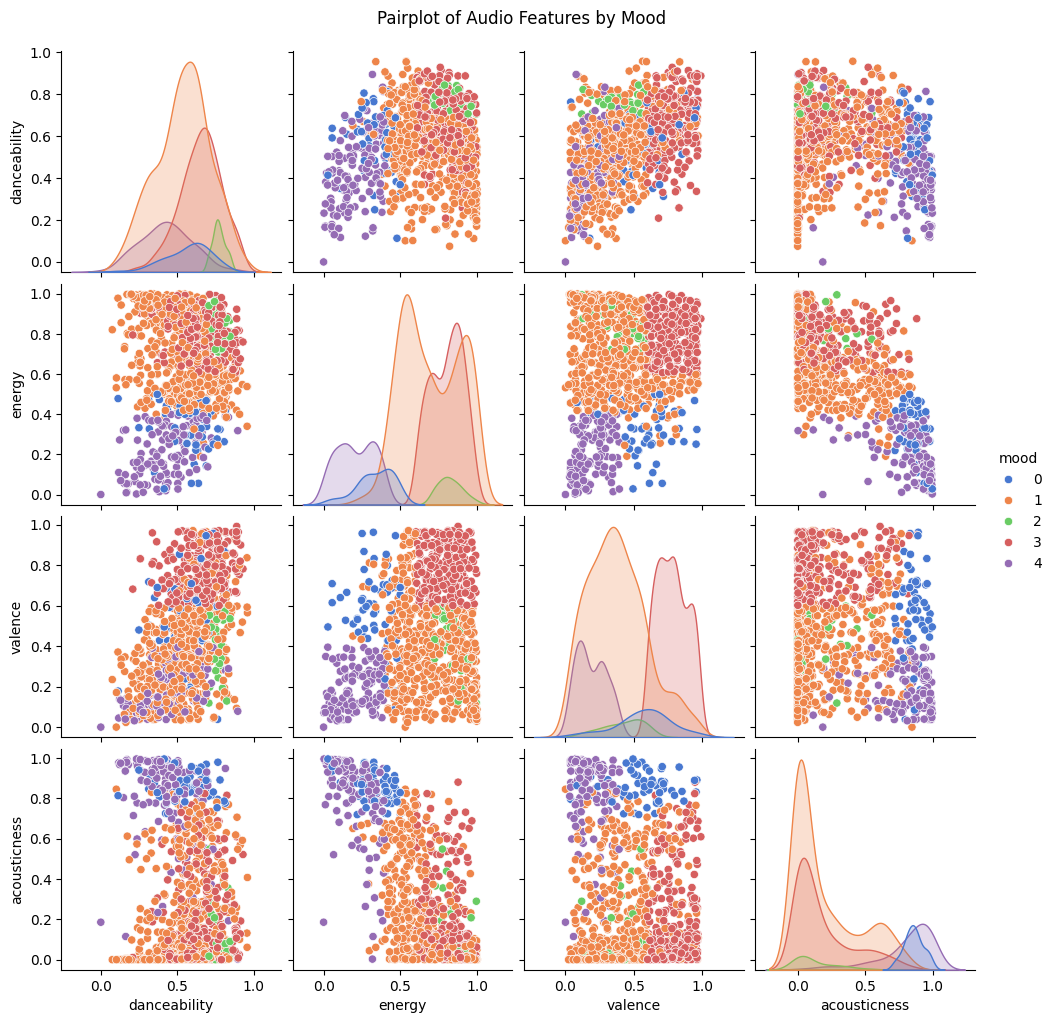

In [ ]:
sample_df = data.sample(1000, random_state=42)  # if large dataset
sns.pairplot(sample_df, vars=audio_features[:4], hue='mood', palette='muted')
plt.suptitle("Pairplot of Audio Features by Mood", y=1.02)
plt.show()


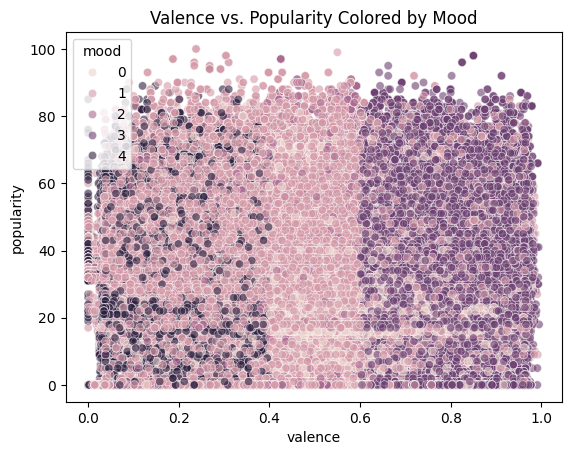

In [85]:
sns.scatterplot(x='valence', y='popularity', hue='mood', data=data, alpha=0.6)
plt.title('Valence vs. Popularity Colored by Mood')
plt.show()


In [87]:
ip=data[['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence',
            'tempo']]
op=data["mood"]
op.shape

(114000,)

In [91]:

op = keras.utils.to_categorical(op, num_classes=5)
op.shape

(114000, 5)

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ip, op, test_size=0.2)
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
y_train


array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [90]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


In [101]:
X_train.shape

(91200, 9)

In [102]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\ASUS\anaconda3\envs\tf_spotify\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,885 (11.27 KB)

 Trainable params: 2,885 (11.27 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
y_train.shape,y_test.shape

((91200, 5), (22800, 5))

In [105]:
model.fit(X_train, y_train, epochs=30, validation_split=0.2)


Epoch 1/30


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8408 - loss: 0.4340 - val_accuracy: 0.9498 - val_loss: 0.1228
Epoch 2/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9582 - loss: 0.1063 - val_accuracy: 0.9706 - val_loss: 0.0813
Epoch 3/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9702 - loss: 0.0745 - val_accuracy: 0.9760 - val_loss: 0.0612
Epoch 4/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9751 - loss: 0.0622 - val_accuracy: 0.9762 - val_loss: 0.0593
Epoch 5/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9794 - loss: 0.0529 - val_accuracy: 0.9772 - val_loss: 0.0538
Epoch 6/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9826 - loss: 0.0456 - val_accuracy: 0.9814 - val_loss: 0.0467
Epoch 7/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9830 - loss: 0.0429 - val_accuracy: 0.9852 - val_loss: 0.0391
Epoch 8/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9838 - loss: 0.0410 - val_accurac

In [106]:
predictions = model.predict(X_test)
predictions

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.0000000e+00, 1.1650166e-18, 5.7459952e-18, 1.0000000e+00,
        6.2961613e-36],
       [0.0000000e+00, 1.0000000e+00, 8.4749400e-19, 0.0000000e+00,
        0.0000000e+00],
       [1.4790107e-10, 1.0000000e+00, 3.5548498e-26, 0.0000000e+00,
        4.2743831e-09],
       ...,
       [0.0000000e+00, 1.0000000e+00, 7.2689944e-11, 0.0000000e+00,
        0.0000000e+00],
       [9.2775563e-06, 9.9999070e-01, 1.7151908e-34, 6.4664142e-14,
        6.4728731e-24],
       [3.7126732e-23, 1.0000000e+00, 6.2345814e-17, 4.8529255e-16,
        7.0705341e-31]], dtype=float32)

In [107]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([3, 1, 1, ..., 1, 1, 1])

In [108]:
y_test=np.argmax(y_test,axis=1)
y_test

array([3, 1, 1, ..., 1, 1, 1])

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,predicted_classes),confusion_matrix(y_test,predicted_classes)

(0.9836842105263158,
 array([[ 1454,    31,     0,     0,     0],
        [   31, 11569,    23,    91,     0],
        [    0,    12,   877,    17,     0],
        [    0,    31,     0,  5776,     0],
        [   77,    59,     0,     0,  2752]]))

In [112]:
import pickle
with open("scaler.pkl","wb") as f:
    pickle.dump(sc,f)
with open("labelEncoder.pkl","wb") as f:
    pickle.dump(le,f)

from tensorflow.keras.models import load_model
model.save("model.h5")

In [118]:
test=[0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489]
test=sc.fit_transform([test])
prediction=model.predict(test)
mood = le.inverse_transform([np.argmax(prediction)])
mood[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


'Chill'